<a href="https://colab.research.google.com/github/sutejym122/Data-Science-and-Machine-Learning-/blob/main/Task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK11

SUTEJ YM 


GO_STP_10487

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(data.dtypes)
print(data.size)
print(data.shape)
print(data.describe())

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
7982
(614, 13)
       ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
count       614.000000         614.000000  ...         600.00000      564.000000
mean       5403.459283        1621.245798  ...         342.00000        0.842199
std        6109.041673        2926.248369  ...          65.12041        0.364878
min         150.000000           0.000000  ...          12.00000        0.000000
25%        2877.500000           0.000000  ...         360.00000        1.000000
50%        3812.500000        1188.500000  ...         360.00000        1.000000
75%        5795.000000     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
a= data['Property_Area'].values
a[0:5]


array(['Urban', 'Rural', 'Urban', 'Urban', 'Urban'], dtype=object)

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Coverting Property_area and loan_status columns that contain strings to numerical values using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Property_Area=le.fit_transform(data.Property_Area)
data.Property_Area.head(20)

0     2
1     0
2     2
3     2
4     2
5     2
6     2
7     1
8     2
9     1
10    2
11    2
12    2
13    0
14    2
15    2
16    2
17    2
18    0
19    2
Name: Property_Area, dtype: int64

In [ ]:
data.Loan_Status=le.fit_transform(data.Loan_Status)
data.Loan_Status.head(20)

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    1
15    1
16    1
17    0
18    0
19    1
Name: Loan_Status, dtype: int64

Replacing null values in Loan amount, loan_amount_term and Credit_history columns by 100, 360.0 and 1.0 respectively

In [ ]:
newdf=data.replace(np.NAN,{'LoanAmount':100,'Loan_Amount_Term':360.0,'Credit_History':1.0})
newdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,100.0,360.0,1.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
newdf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Creating relational plot

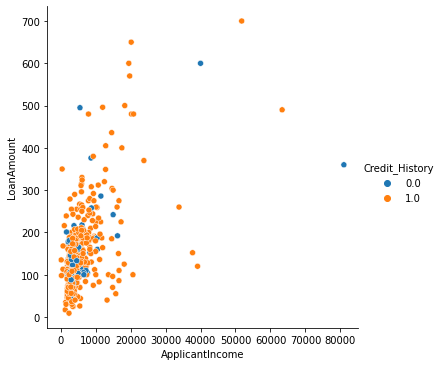

In [ ]:
sns.relplot(x='ApplicantIncome',y='LoanAmount',hue="Credit_History",data=newdf)

Dropping the below columns as they do not impact the outcome of loan status i.e. they aren't features

In [ ]:
x=newdf.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Status'],axis='columns')
print(x)

     ApplicantIncome  CoapplicantIncome  ...  Credit_History  Property_Area
0               5849                0.0  ...             1.0              2
1               4583             1508.0  ...             1.0              0
2               3000                0.0  ...             1.0              2
3               2583             2358.0  ...             1.0              2
4               6000                0.0  ...             1.0              2
..               ...                ...  ...             ...            ...
609             2900                0.0  ...             1.0              0
610             4106                0.0  ...             1.0              0
611             8072              240.0  ...             1.0              2
612             7583                0.0  ...             1.0              2
613             4583                0.0  ...             0.0              1

[614 rows x 6 columns]


In [ ]:
y=newdf['Loan_Status']
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=5)
print(len(x_train))
print(len(x_test))

429
185


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=5)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [ ]:
ypred=model.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
c = confusion_matrix(ytest,ypred)
print("Accuracy : ",accuracy_score(ytest,ypred))
print('Confusion matrix : ')
print(c)

Accuracy :  0.7077922077922078
Confusion matrix : 
[[26 20]
 [25 83]]


[Text(122.73942158385094, 212.49818181818182, 'X[4] <= 0.5\ngini = 0.433\nsamples = 460\nvalue = [146, 314]'),
 Text(31.192546583850934, 202.61454545454546, 'X[1] <= 8115.0\ngini = 0.114\nsamples = 66\nvalue = [62, 4]'),
 Text(20.795031055900623, 192.73090909090908, 'X[2] <= 160.5\ngini = 0.089\nsamples = 64\nvalue = [61, 3]'),
 Text(12.477018633540375, 182.84727272727272, 'X[3] <= 240.0\ngini = 0.038\nsamples = 51\nvalue = [50, 1]'),
 Text(8.31801242236025, 172.96363636363637, 'X[0] <= 2568.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(4.159006211180125, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.477018633540375, 163.07999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(16.6360248447205, 172.96363636363637, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(29.113043478260874, 182.84727272727272, 'X[2] <= 172.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(24.95403726708075, 172.96363636363637, 'X[1] <= 1440.5\ngini = 0.444\nsa

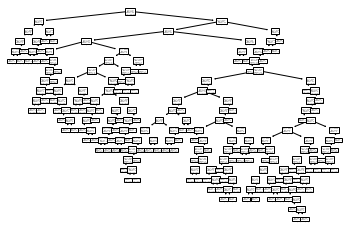

In [ ]:
from sklearn import tree
tree.plot_tree(model)

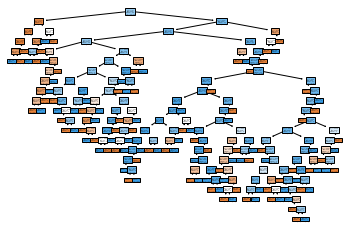

In [ ]:
plt.figure()
tree.plot_tree(model,filled=True)  
plt.savefig('tree.jpg',format='jpg',bbox_inches = "tight")
